In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
df = pd.read_csv('/content/train.tsv',encoding= 'unicode_escape',sep='\t')

**TSV stands for "Tab-Separated Values." It is a plain text file format used to store and exchange structured data, similar to CSV (Comma-Separated Values) files. In a TSV file, data is organized into rows and columns, with each column separated by a tab character.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
from textblob import TextBlob

def add_sentiment_to_df(df):
    sentiment_tuple = []
    for x in range(0, df.shape[0]):
        QuantTextBlob = TextBlob(df.iloc[x][2])
        sentiment = QuantTextBlob.sentiment
        sentiment_tuple.append(sentiment)
    df['Text Score'] = sentiment_tuple
    return df


In [6]:
def add_polarity_to_df(df):
    polarity_scores = []
    for x in range(df.shape[0]):
        QuantTextBlob = TextBlob(df.iloc[x][2])
        polarity = QuantTextBlob.sentiment.polarity
        rounded_polarity = round(polarity, 2)
        polarity_scores.append(rounded_polarity)
    df['Polarity Score'] = polarity_scores
    return df


**The sentiment score produced by TextBlob is a tuple that consists of two values: polarity and subjectivity.**

**Polarity:** It is a float value that ranges from -1 to 1. It represents the sentiment of the text, where -1 indicates a negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a positive sentiment.

**Subjectivity:** It is also a float value that ranges from 0 to 1. It measures the subjectivity of the text, where 0 is very objective (factual) and 1 is very subjective (opinionated).


In [7]:
train_df = add_sentiment_to_df(df)
train_df = add_polarity_to_df(df)
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Text Score,Polarity Score
0,1,1,A series of escapades demonstrating the adage ...,1,"(0.39999999999999997, 0.38125000000000003)",0.4
1,2,1,A series of escapades demonstrating the adage ...,2,"(0.7, 0.6000000000000001)",0.7
2,3,1,A series,2,"(0.0, 0.0)",0.0
3,4,1,A,2,"(0.0, 0.0)",0.0
4,5,1,series,2,"(0.0, 0.0)",0.0


In [8]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as vad
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for analyzing sentiments expressed in text. It is built to handle social media text, which often includes informal language, slang, and other complexities that traditional sentiment analysis tools might struggle with.**

In [9]:
df1 = pd.read_csv('/content/train.tsv',encoding= 'unicode_escape',sep='\t')

In [10]:
vader = df1.copy()
vader.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [11]:
sentiment = vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments = [sentiment.polarity_scores(i) for i in vader['Phrase'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score'] = [i['pos'] for i in sentiments]
vader['Neutral Score'] = [i['neu'] for i in sentiments]
vader['Compound Score'] = [i['compound'] for i in sentiments]
score = vader['Compound Score'].values

t = []

for i in score:
    if i >= 0.05 :
        t.append('Positive')
    elif i <= -0.05:
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment'] = t

In [12]:
vader.head()

,PhraseId,SentenceId,Phrase,Sentiment,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1,0.0,0.157,0.843,0.5579,Positive
1,2,1,A series of escapades demonstrating the adage ...,2,0.0,0.195,0.805,0.4404,Positive
2,3,1,A series,2,0.0,0.000,1.000,0.0000,Neutral
3,4,1,A,2,0.0,0.000,0.000,0.0000,Neutral
4,5,1,series,2,0.0,0.000,1.000,0.0000,Neutral


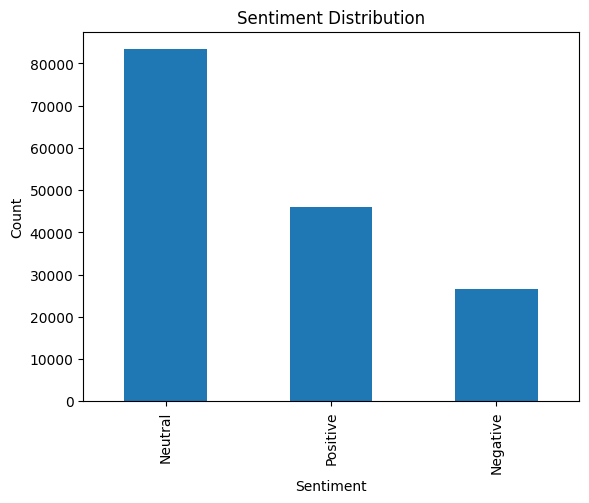

In [15]:
import matplotlib.pyplot as plt
# Calculate the value counts and create the bar plot
vader['Overall Sentiment'].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Display the plot
plt.show()